In [55]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal
import cmath

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 



from IPython.display import Image
import sys 
sys.path.insert(0,'/home/aalmela/scm/git/utn/eaiii/2019/lib/')
import myplot as myp

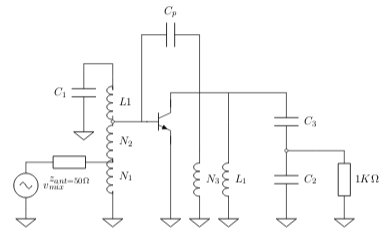

In [56]:
Image(filename= "fig/RF.png",width=450)

El circuito de la figura está adaptado a máxima transferencia de energía a la entrada y a la salida. 
Corresponde a un receptor sintonizado a $F_o=100MHz$ y se busca un ancho de banda de $BW=1 MHz$. 

El $Q_o$ de cada sintonizado es $Q_o=150$. Emplear el mismo inductor para el sintonizado de la entrada y de la salida. Considere que tiene $20 espiras$ .

Por condición de diseño se busca que $Q_1= 1.5 \cdot Q_2$.


Considerando:

$ Z_{ant} = 100 \Omega$

$ R_{L} = 1 K\Omega$


$C_p = 4.7 pF$

Y11=(0,001S//5pF) 

Y12=(-10 -j628)uS 

Y21= (50-j50)mS  

Y22=(0,0001S//5pF) 


## Determinar:

1. Con el transistor unilateral (Y12=0) y sin el capacitor $C_p$

    1.1. $Q_1$, $Q_2$, $L_1$.

    1.2. $N_1$, $N_2$, $C_1$, $C_2$, $C_3$.

    1.3. $|A_v|$

2. Con el transistor real, todos los componentes de los circuitos mantienen los valores calculados del CASO A (Unilateral). Asumir que los tanques siguen resonando a fo con el mismo Q respecto al Ítem A

    2.1. Sin el capacitor $C_p$, determinar el valor del coeficiente de Stern (K) y decidir si el amplificar es estable.

    2.2. Cerrando la llave, determinar la cantidad de espiras $N_3$ para neutralizar la etapa. Indicar también la polaridad relativa del link $N_3$ con respecto a la bobina de colector. 

    2.3. Con el capacitor $C_p$ y $N_3$, determinado en B2 (cantidad de espiras y polaridad), hallar el nuevo valor de Kn (coeficiente de Stern de la etapa neutralizada) y decidir si el amplificar es estable o no. Asumir que los tanques siguen resonando a fo con el mismo Q respecto al ítem A.



In [48]:
## Parametros del transistor

g11 = 0.001
c11 = 5e-12

g12 = -10e-6 
b12 = -628e-6

g21 =  50e-3
b21 = -50e-3


g22 = 0.0001
c22 = 5e-12
 

## Solución

1. Con el transistor unilateral (Y12=0) y sin el capacitor $C_p$

    1.1. $Q_1$, $Q_2$, $L_1$.
    

Se emplea aproximación de banda angosta para el calculo del Q.

$\frac{1}{\sqrt{1+\chi_1^2}} \cdot \frac{1}{\sqrt{1+\chi_2^2}} = \frac{1}{\sqrt{2}}$

$\frac{1}{\sqrt{1+\chi_2^2}} \cdot \frac{1}{\sqrt{1+(1.5 \cdot \chi_2)^2}} = \frac{1}{\sqrt{2}}$

$(1+\chi_2^2) \cdot (1+(1.5 \cdot \chi_2)^2) = 2$

$ 1 + 3.25 \cdot \chi_2^2 + 2.25 \cdot \chi_2^2 = 2$

$ -1 + 3.25 \cdot \chi_2^2 + 2.25 \cdot \chi_2^4 = 0$



In [50]:
# Buscando solución de X

c = -1
b = 3.25
a = 2.25

d = b**2-4*a*c
if d > 0: x = (-b+ (b**2-4*a*c)**0.5 )/(2*a)
else    : x = (-b+ (b**2+4*a*c)**0.5 )/(2*a)

X2 = x**0.5

# Parametros de frecuencia
fo = 100e6
# Delta de frecuencia para 3dB
df = 1e6/2
# Calculo del Q2
Q2 = X2/2*fo/df

X1 = X2 * 1.5

# Calculo del Q1
Q1 = X1/2*fo/fc

print('Q1 = {:1.2f}, Q2 = {:1.2f}'.format(Q1 ,  Q2) )

Q1 = 76.58, Q2 = 51.05


In [52]:
# Para el calculo del inductor se comienza con el de salida ya que a tope de bobina 
# tiene la carga de la resistencia de salida del transistor

# Resistencia de salida del transistor
r22 = 1/g22
Qo = 150

L = (1/Q2-1/Qo)*(r22/2)/(fo*2*np.pi)

print('L1 = {:1.2e}'.format(L) )

L1 = 1.03e-07


1. Con el transistor unilateral (Y12=0) y sin el capacitor $C_p$

    1.2. $N_1$, $N_2$, $C_1$, $C_2$, $C_3$.
    
Para el calculo de la adaptación del sintonizado de entrada, debemos conocer la Rext a tope de bobina ya que el Q1 es distinto del Q2.      

In [54]:
# Resistencia externa a tope de bobina
rext = 1 / ((1/Q1-1/Qo)/(L*fo*2*np.pi))

# Entonces r11 y rant tiene que verse a tope de bobina como:
rgt = 2*rext 


# Numero de espiras del inductor en la entrada para adaptar 
rg = 100

N1  = 20/(rgt/rg)**0.5

# Numero de espiras del adaptador de r11
r11 = 1/g11

N2  = 20/(rgt/r11)**0.5 - N1


print('N1 = {:1.2f}, N2 = {:1.2f}'.format(N1 ,  N2) )

N1 = 1.41, N2 = 3.04


In [6]:
# Capacitor de sintonia

Cs = 1/((2*np.pi*fo)**2*L)



En la salida se emplea un divisor capacitivo para adaptar $RL$.

Este divisor debe presentar $C_s-C_{22}$

Para el calculo del divisor capacitivo se recuerdan las ecuaciones de calculo. 


# Divisor capacitivo:

$$ Q_{m2} = R_L'' \omega C'  $$

# si $Q_{m2} > 10$ 

$$ N =\sqrt[]{\frac{R_L''}{R_L}} $$

$$ Q_{m1} \sim \frac{Q_{m2}}{N}$$


## Si $Q_{m1} < 10$ entonces: 

Volvemos a calcular $Q_{m1}$: 

$$ Q_{m1} = \sqrt[]{\frac{(1+Q_{m2}^2)}{N^2}-1}$$

$$ C_2 = \frac{Q_{m1}}{R_L \omega} $$ 

$$ C_2' = C_2(1+\frac{1}{Q_{m1}^2})$$

$$ C     = \frac{C'}{ (1+\frac{1}{Q_{m2}^2})}$$

$$ C_1 = \frac{C_2' C}{C_2' - C}$$


## Si $Q_{m1} > 10$ entonces: 


$$ C_2 = N C' $$ 

$$ C_1 = \frac{N C' }{N  - 1}$$


In [60]:
r22 = 1/g22
RL  = 1e3

N = (r22/RL)**0.5

Qm2 = r22*2*np.pi*fo*Cs
Qm1 = Qm2/N 


print(Qm2, Qm1)
# por lo tanto se puede utilizar siguientes ecuaciones

Cd = (Cs- 5e-12)
C2 = (Cd)*N 
C3 = (Cd)*N/(N-1) 

# En la entrada el capacitor C1 es el sintonia afectado por el c11

C1 = Cs - c11 * ((N1+N2)/20)**2

print('C1 = {:1.2e}, C2 = {:1.2e}, C3 = {:1.2e}'.format(C1 ,  C2, C3) )

154.7956835591482 48.950693200958796
C1 = 2.44e-11, C2 = 6.21e-11, C3 = 2.87e-11


1. Con el transistor unilateral (Y12=0) y sin el capacitor $C_p$

    1.3. $|A_v|$
    
$|A_v| = |\frac{v_o}{v_g}| = |\frac{v_o}{v_c}| \cdot |\frac{v_c}{v_b}| \cdot |\frac{v_b}{v_i}|\cdot |\frac{v_i}{v_g}|$

$|\frac{v_o}{v_c}| = \frac{1}{N}$

$|\frac{v_c}{v_b}| = g_m \cdot \omega \cdot L \cdot Q_2$

$|\frac{v_b}{v_i}| = \frac{(N_2+N_1)}{(N_1)}$

$ R_{in} = \frac{r_p' \cdot r_{11}''}{rp + r_{11}''} $ 

$ r_p  = (Q_o \cdot \omega L) $

$ r_p' = r_p \cdot (\frac{20}{N1})^2$

$ r_{11}' = r_g $

$|\frac{v_i}{v_g}| =   \frac{R_{in}}{r_g + R_{in}} $


In [61]:
Avoc = 1/N

gm =  (50e-3**2+50e-3**2)**0.5

Avcb = gm  * 2*np.pi*fo * L * Q2 

Avbi = (N2+N1)/N1

rpi =  Qo *   2*np.pi*fo * L * (N1/20)**2

rin = rg*rpi/(rg+rpi)

Avig = rin/(rin+rg)

print('Avoc = {:2.2f}, Avcb = {:2.2f}, Avbi= {:2.2f}, Avig= {:2.2f}'.format(Avoc, Avcb, Avbi, Avig))

Avog = Avoc * Avcb * Avbi * Avig

print('Avog = {:2.2f}'.format(Avog))

Avoc = 0.32, Avcb = 233.22, Avbi= 3.16, Avig= 0.24
Avog = 57.07


2. Con el transistor real, todos los componentes de los circuitos mantienen los valores calculados del CASO A (Unilateral). Asumir que los tanques siguen resonando a fo con el mismo Q respecto al Ítem A

    2.1. Sin el capacitor $C_p$, determinar el valor del coeficiente de Stern (K) y decidir si el amplificar es estable.

In [10]:
def Linvill(yt):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    C = (abs(y12*y21)+(y12*y21).real)/(2*y11.real*y22.real)
    print('###############  LINVILL   #####################')
    print( 'coeficiente de linvill C= {:4.2F}' .format(C))
    if C < 1:
        print( 'Es incondicionalmente estable')
    else :
        print( 'Es potencialmente inestable')
    return C

def Stern(yg, yl, yt):
    y11 = yt[0,0]
    y12 = yt[0,1]
    y21 = yt[1,0]
    y22 = yt[1,1]
    K = (2*(y11.real+yg.real)*(y22.real+yl.real)) / (abs(y12*y21)+(y12*y21).real)
    print('###############  STERN   #####################')
    print( 'coeficiente de stern K= {:4.2F}' .format(K))
    if K > 1:
        print( 'Estable')
    else :
        print( 'Inestable')
    return K


def neutraliza(yt,wo,Cn, N):
    Nn = (-yt[0,1].imag)/(wo*Cn)*N
    y11 =  wo*Cn*1j
    y12 =  wo*Cn*1j*(Nn/N)
    y21 =  wo*Cn*1j*(Nn/N)
    y22 =  wo*Cn*1j*(Nn/N)**2
    yn  = np.matrix([[y11, y12],[ y21, y22]])
    # cuadripolo resultante
    ytn  = yt + yn
    print('n=', Nn/N)
    return (ytn,Nn)

In [66]:
fo = 100e6
wo = 2*np.pi*fo

# Transistor
y11 =    1e-3 + (wo*5e-12)*1j
y12 = - 10e-6 -  628e-6*1j
y21 =  50.0e-3 - 50.0e-3*1j 
y22 =   0.1e-3 +  (wo*5e-12)*1j


yt  = np.matrix([[y11, y12],[ y21, y22]])

# Conductacia de entrada al transistor
gl= (y22.real) + 1/(Qo * wo * L)

# Conductancia de salida al transistor
gg = (y11.real) + 1/(  (Qo * wo * L) *( (N1 + N2)/20 )**2 )


# Calculo del factor de Stern
Stern(gg, gl, yt)





###############  STERN   #####################
coeficiente de stern K= 0.20
Inestable


0.19803754724943928

### 2. Con el transistor real, todos los componentes de los circuitos mantienen los valores calculados del CASO A (Unilateral). Asumir que los tanques siguen resonando a fo con el mismo Q respecto al Ítem A

 
    2.2. Cerrando la llave, determinar la cantidad de espiras N4 para neutralizar la etapa. Indicar también la polaridad relativa del link N3 con respecto a la bobina de colector. 


In [20]:
ytn, N3 =  neutraliza(yt,wo,4.7e-12,20)

print(N3)

n= 0.212658094174
4.25316188348


 2.3. Con el capacitor $C_p$ y $N_3$, determinado en B2 (cantidad de espiras y polaridad), hallar el nuevo valor de Kn (coeficiente de Stern de la etapa neutralizada) y decidir si el amplificar es estable o no. Asumir que los tanques siguen resonando a fo con el mismo Q respecto al ítem A.


In [13]:
yl= (ytn[1,1].real-ytn[1,1].imag*1j)

yg = (ytn[0,0].real-ytn[0,0].imag*1j)

K = Stern(yg, yl, ytn)

###############  STERN   #####################
coeficiente de stern K= 3.95
Estable


In [44]:
## Componentes para LTspice
N   = 20
rp   = Qo *   2*np.pi*fo * L

print(N, N1,N2,N3)

Ln1 = L *(N1/N)**2
Ln2 = L *(N2/N)**2
Ln  = L *((N-N2-N1)/N)**2

Ln3 = L *(N3/N)**2


print('Los datos empleados para los calculos:')

print('.param rg  =  {:1.2f} '.format(rg) )


print('.param g11  =  {:1.3e} '.format(g11) )
print('.param c11  =  {:1.3e} '.format(c11) )

print('.param g12  =  {:1.3e} '.format( (g12)   )  )
print('.param c12  =  {:1.3e} '.format( (b12/wo))  )

print('.param g21  =  {:1.3e} '.format( (g21)   )  )  
print('.param c21  =  {:1.3e} '.format( (b21/wo))  )


print('.param g22  =  {:1.3e} '.format(g22) )
print('.param c22  =  {:1.3e} '.format(c22) )


print('.param RL  =  {:1.1f} '.format(RL) )
print('.param C1 =  {:1.3e} '.format(C1) )
print('.param C2 =  {:1.3e} '.format(C2) )
print('.param C3 =  {:1.3e} '.format(C3) )


print('.param Ln1  =  {:1.4e} '.format(Ln1) )
print('.param Ln2  =  {:1.4e} '.format(Ln2) )
print('.param Ln   =  {:1.4e} '.format(Ln ) )

print('.param L1   =  {:1.4e} '.format(L) )

print('.param Ln3  =  {:1.4e} '.format(Ln3) )


print('.param rp  =  {:1.2f} '.format(rp) )




20 1.4066576878715842 3.041584493988832 4.25316188348
Los datos empleados para los calculos:
.param rg  =  100.00 
.param g11  =  1.000e-03 
.param c11  =  5.000e-12 
.param g12  =  -1.000e-05 
.param c12  =  -9.995e-13 
.param g21  =  5.000e-02 
.param c21  =  -7.958e-11 
.param g22  =  1.000e-04 
.param c22  =  5.000e-12 
.param RL  =  1000.0 
.param C1 =  2.464e-11 
.param C2 =  6.210e-11 
.param C3 =  2.872e-11 
.param Ln1  =  5.0860e-10 
.param Ln2  =  2.3779e-09 
.param Ln   =  6.2167e-08 
.param L1   =  1.0282e-07 
.param Ln3  =  4.6497e-09 
.param rp  =  9690.19 
